In [307]:
# Install the required libraries
!pip install prophet

In [308]:
# Import the required libraries and dependencies
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from prophet import Prophet 

In [309]:
google_df = pd.read_csv("Resources/GOOG-year.csv")
google_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-02,778.200012,781.650024,763.450012,768.700012,768.700012,1872400
1,2016-11-03,767.250000,769.950012,759.030029,762.130005,762.130005,1943200
2,2016-11-04,750.659973,770.359985,750.560974,762.020020,762.020020,2134800
3,2016-11-07,774.500000,785.190002,772.549988,782.520020,782.520020,1585100
4,2016-11-08,783.400024,795.632996,780.190002,790.510010,790.510010,1350800


In [310]:
#Uploading 2018 Google Stock Dataframe
google_2018_df = pd.read_csv("Resources/GOOG.csv",
                      index_col='Date',)
google_2018_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,52.417000,53.347000,52.261501,53.250000,53.250000,24752000
2018-01-03,53.215500,54.314499,53.160500,54.124001,54.124001,28604000
2018-01-04,54.400002,54.678501,54.200100,54.320000,54.320000,20092000
2018-01-05,54.700001,55.212502,54.599998,55.111500,55.111500,25582000
2018-01-08,55.111500,55.563499,55.081001,55.347000,55.347000,20952000


In [311]:
#Uploading Apple Stock Dataframe
apple_df = pd.read_csv("Resources/Apple_stock_history.csv",
                      index_col='Date',)
apple_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100453,0.100890,0.100453,0.100453,469033600,0.0,0.0
1980-12-15,0.095649,0.095649,0.095213,0.095213,175884800,0.0,0.0
1980-12-16,0.088661,0.088661,0.088224,0.088224,105728000,0.0,0.0
1980-12-17,0.090408,0.090845,0.090408,0.090408,86441600,0.0,0.0
1980-12-18,0.093029,0.093466,0.093029,0.093029,73449600,0.0,0.0


In [312]:
#Checking date range of the data 
apple_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-28,180.160004,181.330002,178.529999,179.289993,79144300,0.0,0.0
2021-12-29,179.330002,180.630005,178.139999,179.380005,62348900,0.0,0.0
2021-12-30,179.470001,180.570007,178.089996,178.199997,59773000,0.0,0.0
2021-12-31,178.089996,179.229996,177.259995,177.570007,64025500,0.0,0.0
2022-01-03,177.830002,182.880005,177.710007,182.009995,104487900,0.0,0.0


In [313]:
#Dropping unused data / mostly null
apple_df = apple_df.drop(["Dividends","Stock Splits"], axis=1)
apple_df

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.100453,0.100890,0.100453,0.100453,469033600
1980-12-15,0.095649,0.095649,0.095213,0.095213,175884800
1980-12-16,0.088661,0.088661,0.088224,0.088224,105728000
1980-12-17,0.090408,0.090845,0.090408,0.090408,86441600
1980-12-18,0.093029,0.093466,0.093029,0.093029,73449600
...,...,...,...,...,...
2021-12-28,180.160004,181.330002,178.529999,179.289993,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,62348900
2021-12-30,179.470001,180.570007,178.089996,178.199997,59773000


<Axes: xlabel='Date'>

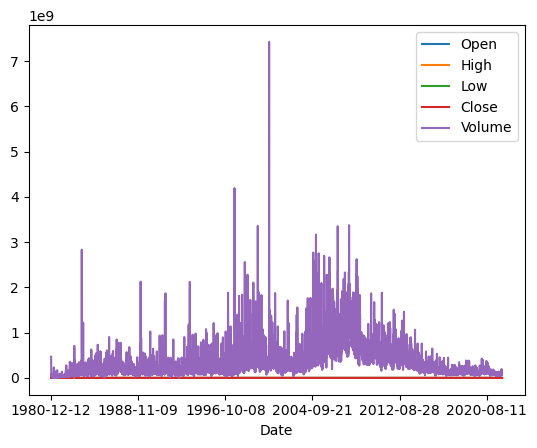

In [314]:
#Plotting the current dataframe
apple_df.plot()

In [315]:
apple_2018_df = apple_df.loc['2018-01-01':'2018-12-31']

In [316]:
#Filtering Apple Dataframe into date range matching the Google Dataframe for future plotting purposes 
filtered_apple_df = apple_df.loc['2016-11-02':'2017-11-01']

In [317]:
#Resetting Dataframe to allow changes to the Date column
filtered_apple_df.reset_index(inplace=True)

In [318]:
#Changing Date column to the Datetime type for easier plotting and comparison 
filtered_apple_df['Date'] = pd.to_datetime(filtered_apple_df['Date'])

/var/folders/54/bwmz35_113gdvs911lppf8980000gn/T/ipykernel_47247/106182929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_apple_df['Date'] = pd.to_datetime(filtered_apple_df['Date'])


In [319]:
#Verifying Datetime type is set 
filtered_apple_df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [320]:
#Setting up apple_predict df for the Prophet model 
#limiting the dataframe to Date and Close columns 
apple_predict = filtered_apple_df[["Date","Close"]]

# Rename the columns to the Prophet model syntax 
apple_predict = apple_predict.rename(columns={"Date":"ds", "Close":"y"})

# Reviewing the apple_predict df 
apple_predict.head()

,ds,y
0,2016-11-02,26.125277
1,2016-11-03,25.845247
2,2016-11-04,25.612276
3,2016-11-07,25.981733
4,2016-11-08,26.134686


In [321]:
# Creating our model for Prophet 
model_apple = Prophet()

In [322]:
# Fitting our apple_predict df for Prophet
model_apple.fit(apple_predict)

22:43:23 - cmdstanpy - INFO - Chain [1] start processing
22:43:23 - cmdstanpy - INFO - Chain [1] done processing


In [323]:
# Setting up future_apple df and the range of the prediction from Prophet model
future_apple = model_apple.make_future_dataframe(periods=52, freq="W")
future_apple.tail()

,ds
299,2018-09-30
300,2018-10-07
301,2018-10-14
302,2018-10-21
303,2018-10-28


In [324]:
# creating forecast_apple df for the predictions and running them through the Prophet model and Fit models
forecast_apple = model_apple.predict(future_apple)

forecast_apple.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-11-02,25.392623,24.433711,26.247880,25.392623,25.392623,-0.020010,-0.020010,-0.020010,-0.020010,-0.020010,-0.020010,0.0,0.0,0.0,25.372613
1,2016-11-03,25.430693,24.321271,26.165350,25.430693,25.430693,-0.206588,-0.206588,-0.206588,-0.206588,-0.206588,-0.206588,0.0,0.0,0.0,25.224105
2,2016-11-04,25.468763,24.406983,26.180123,25.468763,25.468763,-0.158892,-0.158892,-0.158892,-0.158892,-0.158892,-0.158892,0.0,0.0,0.0,25.309871
3,2016-11-07,25.582972,24.436653,26.280592,25.582972,25.582972,-0.197236,-0.197236,-0.197236,-0.197236,-0.197236,-0.197236,0.0,0.0,0.0,25.385737
4,2016-11-08,25.621042,24.623907,26.347160,25.621042,25.621042,-0.052023,-0.052023,-0.052023,-0.052023,-0.052023,-0.052023,0.0,0.0,0.0,25.569018


In [325]:
# placing the predictions into a filtered df apple_plot_future for easier plotting 
apple_plot_future = forecast_apple[["ds", "yhat","yhat_lower","yhat_upper"]]
apple_plot_future

,ds,yhat,yhat_lower,yhat_upper
0,2016-11-02,25.372613,24.433711,26.247880
1,2016-11-03,25.224105,24.321271,26.165350
2,2016-11-04,25.309871,24.406983,26.180123
3,2016-11-07,25.385737,24.436653,26.280592
4,2016-11-08,25.569018,24.623907,26.347160
...,...,...,...,...
299,2018-09-30,37.972845,16.351378,59.256186
300,2018-10-07,37.968797,15.814499,60.351862
301,2018-10-14,37.964750,14.867391,60.667977
302,2018-10-21,37.960702,14.534968,61.344321


<Axes: >

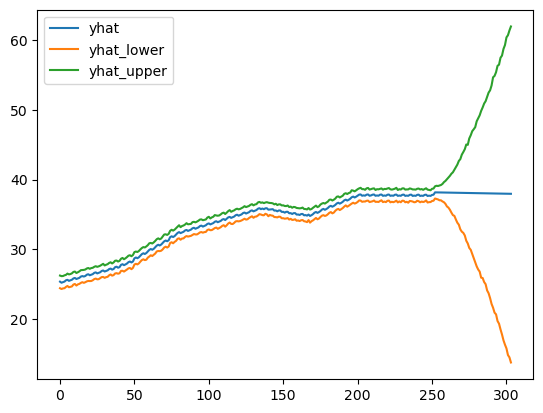

In [326]:
# Plotting the data from the filtered prediction df
apple_plot_future[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-720:,:].plot()

In [327]:
# checking end date data of the prediction df 
apple_plot_future.tail()

,ds,yhat,yhat_lower,yhat_upper
299,2018-09-30,37.972845,16.351378,59.256186
300,2018-10-07,37.968797,15.814499,60.351862
301,2018-10-14,37.964750,14.867391,60.667977
302,2018-10-21,37.960702,14.534968,61.344321
303,2018-10-28,37.956655,13.800591,61.918645


/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


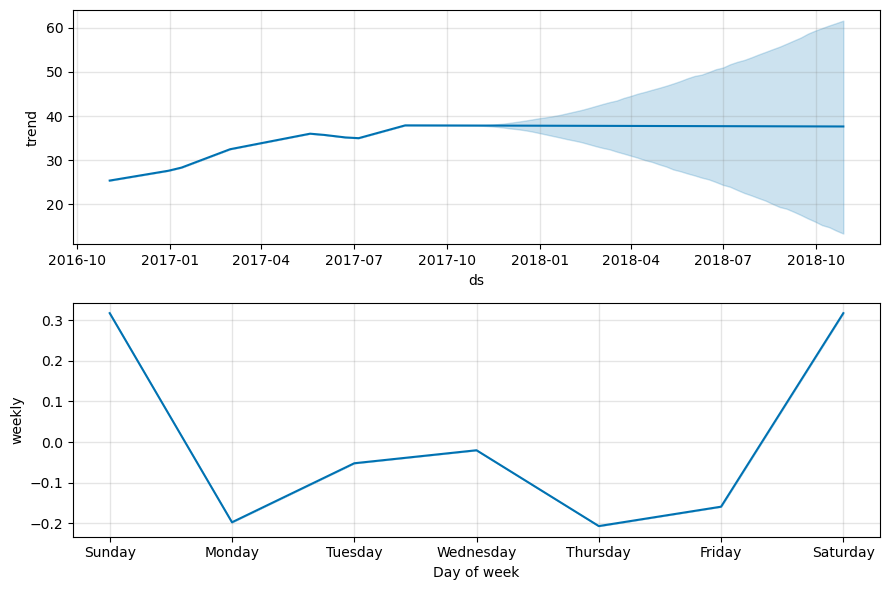

In [328]:
# placing the preditcion data into a plot by day of week and year to see any possible trends 
fig2 = model_apple.plot_components(forecast_apple)

In [329]:
# Filtering the apple_df into the 2018 year 
apple_2018_df

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,40.686046,41.197730,40.470850,41.188164,102223600
2018-01-03,41.252724,41.735717,41.116436,41.180992,118071600
2018-01-04,41.255110,41.477479,41.145124,41.372272,89738400
2018-01-05,41.470309,41.931779,41.377058,41.843311,94640000
2018-01-08,41.687889,41.989160,41.587462,41.687889,82271200
...,...,...,...,...,...
2018-12-24,35.955166,36.780329,35.576563,35.634811,148676800
2018-12-26,35.991567,38.158825,35.608109,38.144264,234330000
2018-12-27,37.821486,38.047194,36.421143,37.896721,212468400


<Axes: xlabel='Date'>

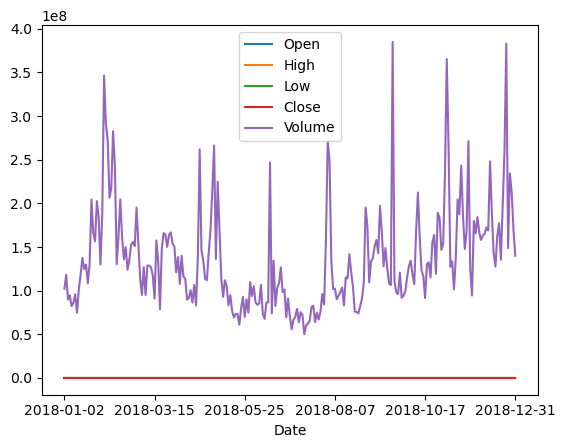

In [330]:
#plotting the data from the filtered df 
apple_2018_df.plot()

In [331]:
#Viewing the data of filtered df
apple_2018_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,40.686046,41.197730,40.470850,41.188164,102223600
2018-01-03,41.252724,41.735717,41.116436,41.180992,118071600
2018-01-04,41.255110,41.477479,41.145124,41.372272,89738400
2018-01-05,41.470309,41.931779,41.377058,41.843311,94640000
2018-01-08,41.687889,41.989160,41.587462,41.687889,82271200


In [332]:
# Checking data types 
apple_2018_df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [333]:
#filtering the data to the Close column  
apple_2018_filtered = apple_2018_df[["Close"]]
apple_2018_filtered.head()

,Close
Date,
2018-01-02,41.188164
2018-01-03,41.180992
2018-01-04,41.372272
2018-01-05,41.843311
2018-01-08,41.687889


In [334]:
# Checking the end of the data 
apple_2018_filtered.tail()

,Close
Date,
2018-12-24,35.634811
2018-12-26,38.144264
2018-12-27,37.896721
2018-12-28,37.916142
2018-12-31,38.282600


<Axes: xlabel='Date'>

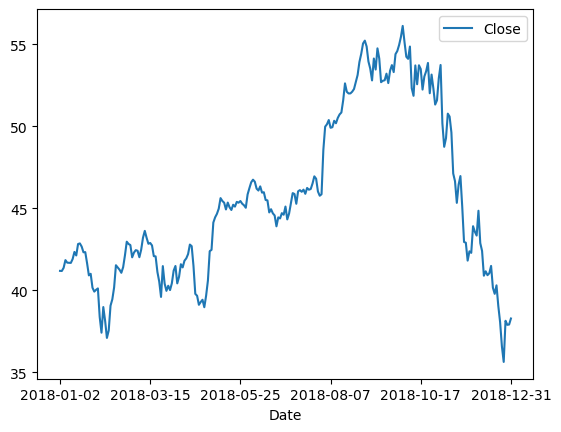

In [335]:
#Plotting the filtered data and index 
apple_2018_filtered.plot()

In [336]:
# Reset the index so we could apply different type to Data column 
apple_2018_filtered.reset_index(inplace=True)

In [337]:
# applied datetime to Date column 
apple_2018_filtered['Date'] = pd.to_datetime(apple_2018_filtered['Date'])

/var/folders/54/bwmz35_113gdvs911lppf8980000gn/T/ipykernel_47247/1284695744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_2018_filtered['Date'] = pd.to_datetime(apple_2018_filtered['Date'])


In [338]:
#Checking the data types to be sure datetime appended 
apple_2018_filtered.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [339]:
# Setting the index back to Date so that it will plot well
apple_2018_filtered.set_index('Date', inplace=True)

In [340]:
# Checking data to be sure Date was set to index 
apple_2018_filtered

,Close
Date,
2018-01-02,41.188164
2018-01-03,41.180992
2018-01-04,41.372272
2018-01-05,41.843311
2018-01-08,41.687889
...,...
2018-12-24,35.634811
2018-12-26,38.144264
2018-12-27,37.896721


In [341]:
# Checking data on apple_plot_future/ realized ds was not set as index hence plotting error 
apple_plot_future

,ds,yhat,yhat_lower,yhat_upper
0,2016-11-02,25.372613,24.433711,26.247880
1,2016-11-03,25.224105,24.321271,26.165350
2,2016-11-04,25.309871,24.406983,26.180123
3,2016-11-07,25.385737,24.436653,26.280592
4,2016-11-08,25.569018,24.623907,26.347160
...,...,...,...,...
299,2018-09-30,37.972845,16.351378,59.256186
300,2018-10-07,37.968797,15.814499,60.351862
301,2018-10-14,37.964750,14.867391,60.667977
302,2018-10-21,37.960702,14.534968,61.344321


In [342]:
# set index to ds for plotting 
apple_plot_future.set_index('ds', inplace=True)

In [343]:
# Confirimg ds was set to index 
apple_plot_future

,yhat,yhat_lower,yhat_upper
ds,,,
2016-11-02,25.372613,24.433711,26.247880
2016-11-03,25.224105,24.321271,26.165350
2016-11-04,25.309871,24.406983,26.180123
2016-11-07,25.385737,24.436653,26.280592
2016-11-08,25.569018,24.623907,26.347160
...,...,...,...
2018-09-30,37.972845,16.351378,59.256186
2018-10-07,37.968797,15.814499,60.351862
2018-10-14,37.964750,14.867391,60.667977


In [344]:
# confiriming data types and dates 
apple_plot_future.index

DatetimeIndex(['2016-11-02', '2016-11-03', '2016-11-04', '2016-11-07',
               '2016-11-08', '2016-11-09', '2016-11-10', '2016-11-11',
               '2016-11-14', '2016-11-15',
               ...
               '2018-08-26', '2018-09-02', '2018-09-09', '2018-09-16',
               '2018-09-23', '2018-09-30', '2018-10-07', '2018-10-14',
               '2018-10-21', '2018-10-28'],
              dtype='datetime64[ns]', name='ds', length=304, freq=None)

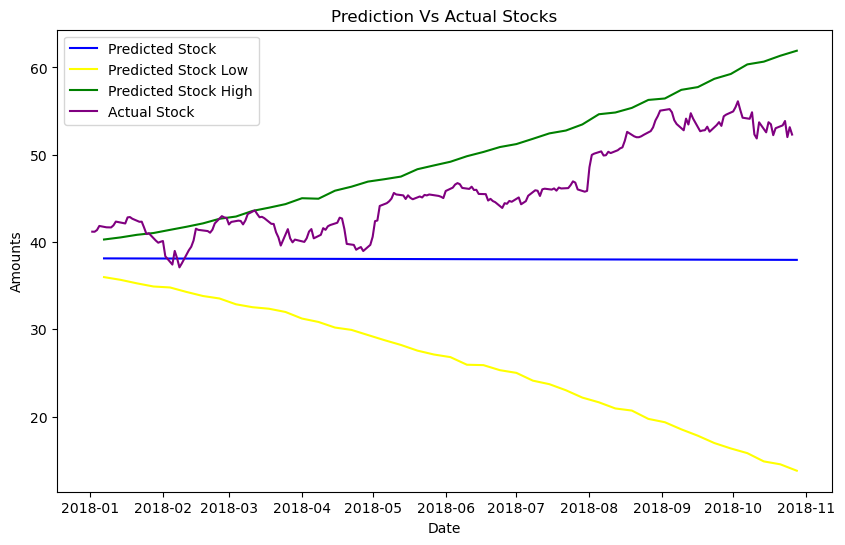

In [345]:
# Plotting both predicted df apple_plot_future and actual stock data apple_2018_filtered to view the accuracy 
# of the predict model in this instance 
# making sure the data being plotted matches each other in date for easy plotting and viewing of data 

plt.figure(figsize=(10, 6))

apple_plot_future = apple_plot_future.loc['2018-01-02':'2018-10-28']
apple_2018_filtered = apple_2018_filtered.loc['2018-01-02':'2018-10-28']


plt.plot(apple_plot_future['yhat'], label='Predicted Stock', color= 'blue')
plt.plot(apple_plot_future['yhat_lower'], label='Predicted Stock Low', color= 'yellow')
plt.plot(apple_plot_future['yhat_upper'], label='Predicted Stock High', color= 'green')
plt.plot(apple_2018_filtered['Close'], label='Actual Stock', color= 'purple')

plt.title('Prediction Vs Actual Stocks')
plt.xlabel('Date')
plt.ylabel('Amounts')

plt.legend()
plt.show()

In [346]:
# Checking the data from google_df
display(google_df.head())
display(google_df.tail())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-02,778.200012,781.650024,763.450012,768.700012,768.700012,1872400
1,2016-11-03,767.250000,769.950012,759.030029,762.130005,762.130005,1943200
2,2016-11-04,750.659973,770.359985,750.560974,762.020020,762.020020,2134800
3,2016-11-07,774.500000,785.190002,772.549988,782.520020,782.520020,1585100
4,2016-11-08,783.400024,795.632996,780.190002,790.510010,790.510010,1350800


,Date,Open,High,Low,Close,Adj Close,Volume
247,2017-10-26,980.000000,987.599976,972.200012,972.559998,972.559998,2042100
248,2017-10-27,1009.190002,1048.390015,1008.200012,1019.270020,1019.270020,5167700
249,2017-10-30,1014.000000,1024.969971,1007.500000,1017.109985,1017.109985,2085100
250,2017-10-31,1015.219971,1024.000000,1010.419983,1016.640015,1016.640015,1330700
251,2017-11-01,1017.210022,1029.670044,1016.950012,1025.500000,1025.500000,1373444


In [347]:
# Checking all column names from google_df
google_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<Axes: >

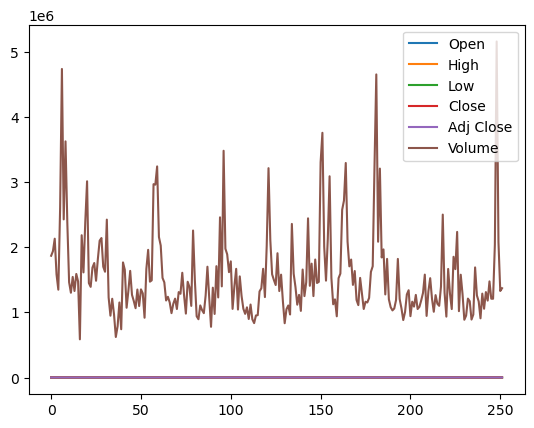

In [348]:
# Plotting google_df data 
google_df.plot()

In [349]:
# Checking date range of the data 
google_df.Date

0      2016-11-02
1      2016-11-03
2      2016-11-04
3      2016-11-07
4      2016-11-08
          ...    
247    2017-10-26
248    2017-10-27
249    2017-10-30
250    2017-10-31
251    2017-11-01
Name: Date, Length: 252, dtype: object

In [350]:
# Setting up google_predict df for the Prophet model 
# limiting the dataframe to Date and Close columns 
# Changing the Date and Close columns names to ds and y to work with Prophet 

google_predict = google_df[["Date", "Close"]]

# Rename the columns to the Prophet model syntax 
google_predict = google_predict.rename(columns={"Date":"ds", "Close":"y"})

# Review the Canada DataFrame
google_predict.head()

,ds,y
0,2016-11-02,768.700012
1,2016-11-03,762.130005
2,2016-11-04,762.020020
3,2016-11-07,782.520020
4,2016-11-08,790.510010


In [351]:
# Creating our model for Prophet 
model_google = Prophet()

In [352]:
# Fitting our google_predict df for Prophet
model_google.fit(google_predict)

22:43:24 - cmdstanpy - INFO - Chain [1] start processing
22:43:24 - cmdstanpy - INFO - Chain [1] done processing


In [353]:
# Setting up future_google df and the range of the prediction from Prophet model
future_google = model_google.make_future_dataframe(periods=52, freq="W")
future_google.tail()

,ds
299,2018-09-30
300,2018-10-07
301,2018-10-14
302,2018-10-21
303,2018-10-28


In [354]:
# creating forecast_google df for the predictions and running them through the Prophet model and Fit models
forecast_google = model_google.predict(future_google)

forecast_google.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-11-02,759.529397,738.566825,778.861389,759.529397,759.529397,-0.143982,-0.143982,-0.143982,-0.143982,-0.143982,-0.143982,0.0,0.0,0.0,759.385415
1,2016-11-03,760.126835,737.658197,777.445949,760.126835,760.126835,-2.607331,-2.607331,-2.607331,-2.607331,-2.607331,-2.607331,0.0,0.0,0.0,757.519504
2,2016-11-04,760.724273,741.117010,779.062267,760.724273,760.724273,-1.109284,-1.109284,-1.109284,-1.109284,-1.109284,-1.109284,0.0,0.0,0.0,759.614989
3,2016-11-07,762.516588,739.438889,779.706930,762.516588,762.516588,-2.584549,-2.584549,-2.584549,-2.584549,-2.584549,-2.584549,0.0,0.0,0.0,759.932039
4,2016-11-08,763.114026,742.294540,781.317381,763.114026,763.114026,-1.117252,-1.117252,-1.117252,-1.117252,-1.117252,-1.117252,0.0,0.0,0.0,761.996774


In [355]:
# placing the predictions into a filtered df google_plot_future for easier plotting 
google_plot_future = forecast_google[["ds", "yhat","yhat_lower","yhat_upper"]]
google_plot_future

,ds,yhat,yhat_lower,yhat_upper
0,2016-11-02,759.385415,738.566825,778.861389
1,2016-11-03,757.519504,737.658197,777.445949
2,2016-11-04,759.614989,741.117010,779.062267
3,2016-11-07,759.932039,739.438889,779.706930
4,2016-11-08,761.996774,742.294540,781.317381
...,...,...,...,...
299,2018-09-30,1362.238795,864.791972,1781.513214
300,2018-10-07,1369.860031,863.884927,1804.961340
301,2018-10-14,1377.481266,862.236726,1824.654731
302,2018-10-21,1385.102502,844.203550,1853.189290


<Axes: >

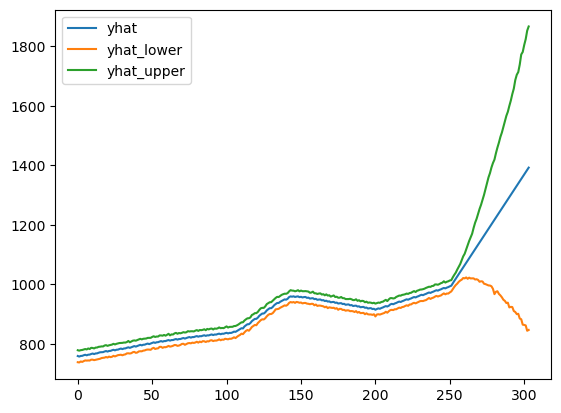

In [356]:
# Plotting google_plot_future predictions 
google_plot_future[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-720:,:].plot()

In [357]:
# Checking datatypes 
google_plot_future.dtypes

ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


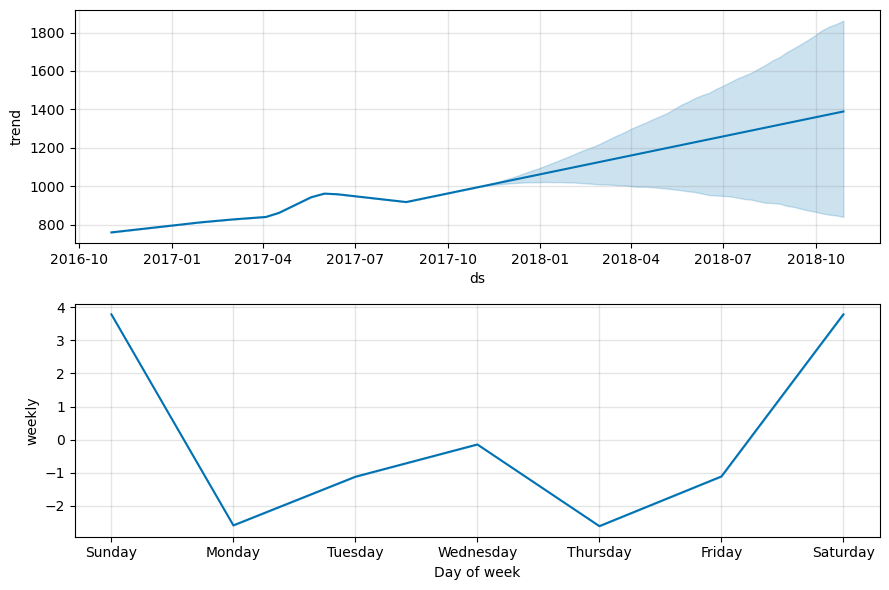

In [358]:
# Putting the data into figure showing day of week and yearly data to spot trends 
fig3 = model_google.plot_components(forecast_google)

<Axes: xlabel='Date'>

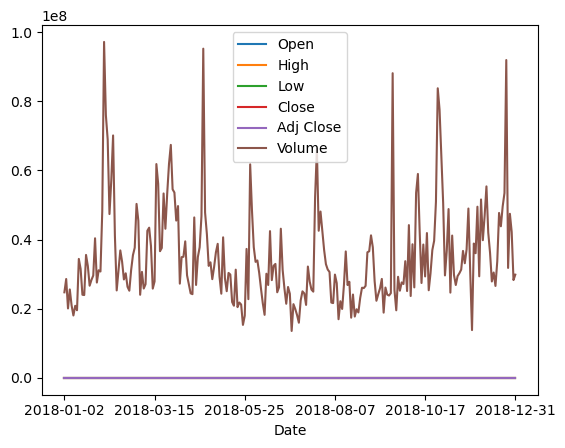

In [359]:
# Setting Data limits by range of date and plotting 
google_2018_df = google_2018_df.loc['2018-01-01':'2018-12-31']
google_2018_df.plot()

In [360]:
# Checking the data 
google_2018_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,52.417000,53.347000,52.261501,53.250000,53.250000,24752000
2018-01-03,53.215500,54.314499,53.160500,54.124001,54.124001,28604000
2018-01-04,54.400002,54.678501,54.200100,54.320000,54.320000,20092000
2018-01-05,54.700001,55.212502,54.599998,55.111500,55.111500,25582000
2018-01-08,55.111500,55.563499,55.081001,55.347000,55.347000,20952000


In [361]:
# resetting the index to change Date column data type 
google_2018_df.reset_index(inplace=True)

In [362]:
# Date dtype is object needs to be datetime 
google_2018_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [363]:
# Changing Date column to datetime dtype 
google_2018_df['Date'] = pd.to_datetime(google_2018_df['Date'])

In [364]:
# Checking data types 
google_2018_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [365]:
# Set the index back to Date with the new dtype 
google_2018_df.set_index('Date', inplace=True)

In [366]:
# confiriming Date is set to index 
google_2018_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,52.417000,53.347000,52.261501,53.250000,53.250000,24752000
2018-01-03,53.215500,54.314499,53.160500,54.124001,54.124001,28604000
2018-01-04,54.400002,54.678501,54.200100,54.320000,54.320000,20092000
2018-01-05,54.700001,55.212502,54.599998,55.111500,55.111500,25582000
2018-01-08,55.111500,55.563499,55.081001,55.347000,55.347000,20952000


In [367]:
# filtering the data to the needed columns 
google_2018_filerted = google_2018_df[["Close"]]
google_2018_filerted.head()

,Close
Date,
2018-01-02,53.250000
2018-01-03,54.124001
2018-01-04,54.320000
2018-01-05,55.111500
2018-01-08,55.347000


<Axes: xlabel='Date'>

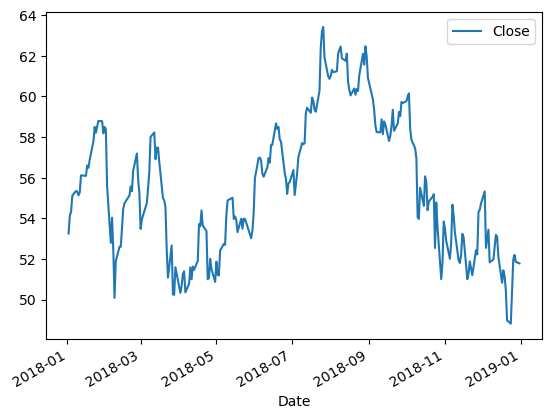

In [368]:
# Plotting the data for viewing 
google_2018_filerted.plot()

In [369]:
# indexing the google_plot_future df to the ds for ease of plotting on similar data 
google_plot_future.set_index('ds', inplace=True)

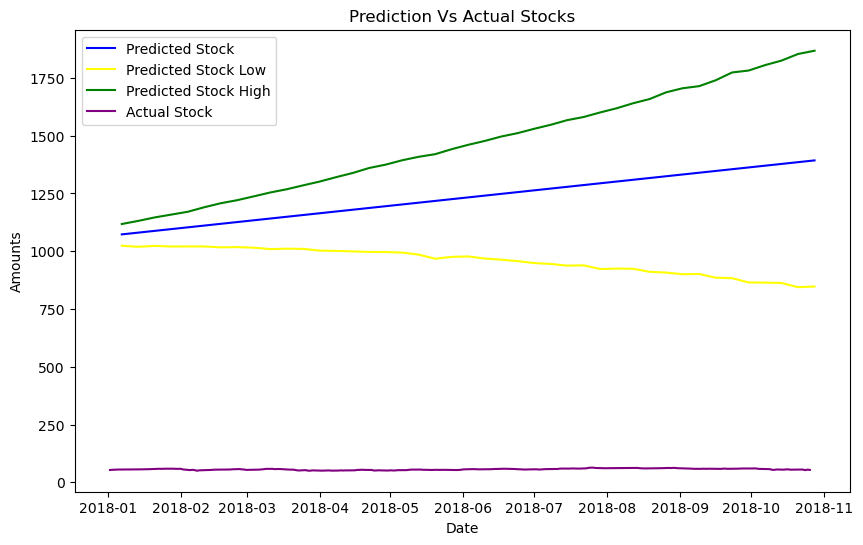

In [370]:
# Plotting both predicted dfgoogle_plot_future and actual stock data apple_2018_filtered to view the accuracy 
# of the predict model in this instance 
# making sure the data being plotted matches each other in date for easy plotting and viewing of data 

plt.figure(figsize=(10, 6))

google_plot_future = google_plot_future.loc['2018-01-02':'2018-10-28']
google_2018_filerted = google_2018_filerted.loc['2018-01-02':'2018-10-28']


plt.plot(google_plot_future['yhat'], label='Predicted Stock', color= 'blue')
plt.plot(google_plot_future['yhat_lower'], label='Predicted Stock Low', color= 'yellow')
plt.plot(google_plot_future['yhat_upper'], label='Predicted Stock High', color= 'green')
plt.plot(google_2018_filerted['Close'], label='Actual Stock', color= 'purple')

plt.title('Prediction Vs Actual Stocks')
plt.xlabel('Date')
plt.ylabel('Amounts')

plt.legend()
plt.show()